# Worksheet 4: Different Types of Input Variables and Interactions

# Multiple Linear Regression (MLR)

This week we are going to "unleash" the scope of linear regression models and use them to study the association between a continuous response and *many* input variables of *different types*!! 

A linear regression model with many input variables is usually called a **Multiple Linear Regression (MLR)**. We will present models with:

- Continuous and categorical input variables


- Additive models and models with interaction terms

# Learning Objectives:

After completing this week's lecture and tutorial work, you will be able to:

1. Give an example of a real problem that could be answered by a multiple linear regression.

2. Interpret the coefficients and p-values of different types of input variables, including categorical input variables.

3. Define interactions in the context of linear regression.

4. Write a computer script to perform linear regression when input variables are continuous or discrete, and when there are interactions between some of these variables.

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
source("tests_worksheet_04.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from

# PART I

## 1. MLR: additive models with continuous input variables

In this section, we will continue working with the dataset `US_cancer_data` introduced in `worksheet_03`. You noticed that there exists a positive association between mortality rates (measured by `TARGET_deathRate`) and the percentage of the county's populace in poverty (measured by `povertyPercent`).

However, there may be other variables associated with mortality. Let's start by visualizing again the relationship between the variables in our data using the plotting function `ggpairs()`, from the library `GGally`. The `ggplot()` object's name will be `US_cancer_data_pairplots`.

In [2]:
US_cancer_data <- read_csv("data/US_county_cancer_data.csv") %>%
  select(TARGET_deathRate, povertyPercent, PctPrivateCoverage)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


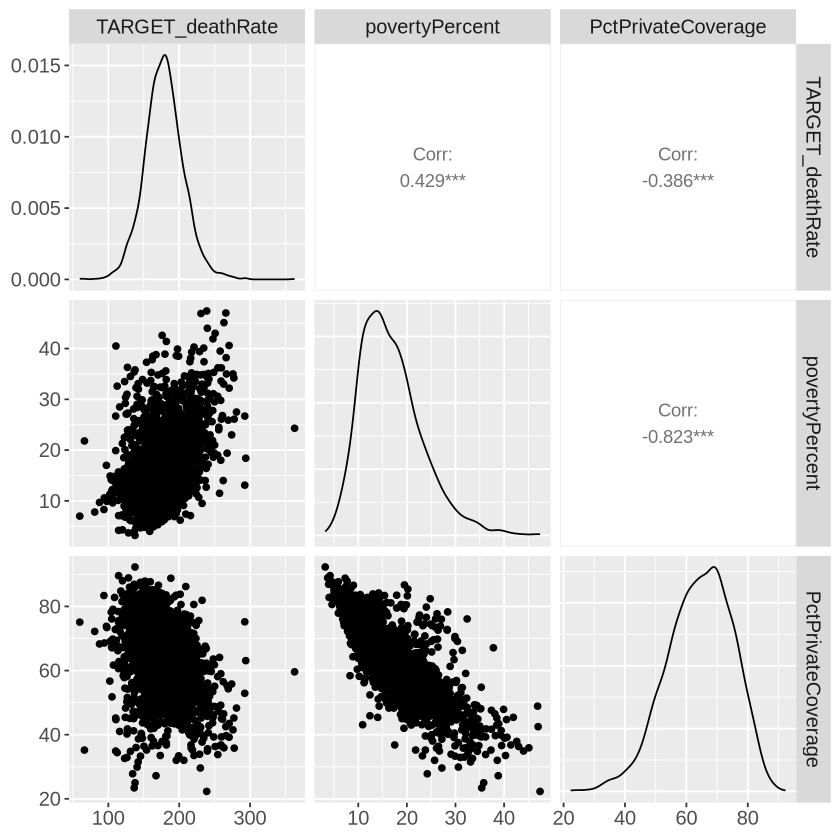

In [3]:
US_cancer_data_pairplots <- US_cancer_data %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
US_cancer_data_pairplots

#### <font color="blue">Should we study the relation of the response with input variables separately or jointly using linear regressions? </font>

### R Code

In R, you can add input variables in the RHS of the formula with signs `+` or `*`, depending on the assumptions made. For example, in an **additive model**, variables are added to the model using `+`. If you want to model interactions between variables you use `*`.

`MLR_poverty_coverage_add <- lm(TARGET_deathRate ~ povertyPercent + PctPrivateCoverage, data = US_cancer_data)`

**Question 1.0**
<br>{points: 2}

Using the dataset `US_cancer_data` fit the following 3 models:

**A.** A SLR with `TARGET_deathRate` as the response and `povertyPercent` as a single input variable. Call this model `SLR_poverty`

**B.** A SLR with `TARGET_deathRate` as the response and `PctPrivateCoverage` as a single input variable. Call this model `SLR_coverage`

**C.** An additive MLR with `TARGET_deathRate` as the response and `povertyPercent` and `PctPrivateCoverage` as input variables. Call this model `MLR_poverty_coverage`

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [4]:
# Model A 
# SLR_poverty <- ...(..., ...)
# SLR_poverty

# Model B
# SLR_coverage <- ...(..., ...)
# SLR_coverage

# Model C
# MLR_poverty_coverage <- ...(..., ...)
# MLR_poverty_coverage

# your code here
# Model A 
SLR_poverty <- lm(TARGET_deathRate ~ povertyPercent, data = US_cancer_data)
SLR_poverty

# Model B
SLR_coverage <- lm(TARGET_deathRate ~ PctPrivateCoverage, data = US_cancer_data)
SLR_coverage

# Model C
MLR_poverty_coverage <- lm(TARGET_deathRate ~ povertyPercent + PctPrivateCoverage, data = US_cancer_data)
MLR_poverty_coverage


Call:
lm(formula = TARGET_deathRate ~ povertyPercent, data = US_cancer_data)

Coefficients:
   (Intercept)  povertyPercent  
       147.283           1.859  



Call:
lm(formula = TARGET_deathRate ~ PctPrivateCoverage, data = US_cancer_data)

Coefficients:
       (Intercept)  PctPrivateCoverage  
           243.423              -1.006  



Call:
lm(formula = TARGET_deathRate ~ povertyPercent + PctPrivateCoverage, 
    data = US_cancer_data)

Coefficients:
       (Intercept)      povertyPercent  PctPrivateCoverage  
           170.445               1.497              -0.265  


In [5]:
test_1.0.0()
test_1.0.1()
test_1.0.2()

Test passed 😀
Test passed 🌈
[1] "Success!"
Test passed 🌈
Test passed 😀
[1] "Success!"
Test passed 😸
Test passed 🎉
[1] "Success!"
Test passed 🎉
Test passed 🌈
[1] "Success!"
Test passed 😸
Test passed 😸
[1] "Success!"
Test passed 🌈
Test passed 🥇
[1] "Success!"


**Question 1.1**
<br>{points: 1}

Use `tidy` and manipulate the output to obtain the estimated coefficients of the variable `PctPrivateCoverage` in models **B** and **C**, respectively. Assign your answer to an object called `SLR_coverage_coef` and `MLR_coverage_coef`, respectively.

*Fill out those parts indicated with ..., uncomment the corresponding code in the cell below, and run it.*

In [6]:
#SLR_coverage_coef <- tidy(...) %>% mutate_if(is.numeric, round, 2) %>% 
#                        subset(term == "...")  %>% pull(...)
#SLR_coverage_coef

#MLR_coverage_coef <- tidy(MLR_cancer_poverty_coverage) %>% mutate_if(is.numeric, round, 2) %>% 
#                        subset(term == "...")  %>% pull(...)
#MLR_coverage_coef



# your code here
SLR_coverage_coef <- tidy(SLR_coverage) %>% mutate_if(is.numeric, round, 2) %>% 
                       subset(term == "PctPrivateCoverage")  %>% pull(estimate)
SLR_coverage_coef

MLR_coverage_coef <- tidy(MLR_poverty_coverage) %>% mutate_if(is.numeric, round, 2) %>% 
                       subset(term == "PctPrivateCoverage")  %>% pull(estimate)
MLR_coverage_coef

[1] -1.01

[1] -0.26

In [7]:
test_1.1.0()
test_1.1.1()

Test passed 😀
Test passed 🎉
Test passed 🎉
[1] "Success!"
Test passed 🌈
Test passed 🥇
Test passed 😀
[1] "Success!"


The results from **Question 1.1** show that the estimated relation between `TARGET_deathRate` and `PctPrivateCoverage` is ***not*** the same in both models. 

#### But why??

- **In the MLR**, the coefficient of `PctPrivateCoverage` models the relation between `TARGET_deathRate` and `PctPrivateCoverage` *for any fix percentage of populace in poverty*.


- **In the SLR**, the variable `povertyPercent` is not even in the model!! Thus, the variation in mortality due to this variable is part of the error term, together with many other variables that may be related with mortality!!

Keeping these observations in mind, distinguish between the following interpretations:

**Question 1.2**
<br>{points: 1}

Use the estimates from **Question 1.1** to complete the following interpretations:

1. ***On average***, the expected cancer mortality per capita is related with a `answer1.2.0` (cases/100,000) change for every 1 percent increase percentage of county residents with private health coverage. 


2. ***At any fix percentage of populace in poverty***, the expected cancer mortality per capita is related with a `answer1.2.1` (cases/100,000) change for every 1 percent increase percentage of county residents with private health coverage.


*Assign your answers to the objects `answer1.2.0` and `answer1.2.1` (numeric type).* 

**Tip: Your answers should be the names of the objects used to store the estimates in the previous question**

In [8]:
# answer1.2.0 <- ...
#answer1.2.0

# answer1.2.1 <- ...
#answer1.2.1

# your code here
answer1.2.0 <- SLR_coverage_coef
answer1.2.0

answer1.2.1 <- MLR_coverage_coef
answer1.2.1

[1] -1.01

[1] -0.26

In [9]:
test_1.2.0()
test_1.2.1()

Test passed 🎊
Test passed 🌈
Test passed 🎊
[1] "Success!"
Test passed 😸
Test passed 🌈
Test passed 😸
[1] "Success!"


**Question 1.3**
<br>{points: 1}

As we have learned for SLRs, `lm` uses some theoretical results to measure the sample-to-sample variation of the estimators. The same is true for the estimators of MLR coefficients! 

Use `tidy` to obtain the standard errors, statistics, and p-values for the coefficients of `MLR_poverty_coverage` model which are needed to perform statistical hypothesis tests. 

Store them in the variable `MLR_poverty_coverage_results`.

*Fill out those parts indicated with ..., uncomment the corresponding code in the cell below, and run it.*

In [10]:
# MLR_poverty_coverage_results <- ...(...) %>% mutate_if(is.numeric, round, 2)
# MLR_poverty_coverage_results

# your code here
MLR_poverty_coverage_results <- tidy(MLR_poverty_coverage) %>% mutate_if(is.numeric, round, 2)
MLR_poverty_coverage_results



term               estimate std.error statistic p.value
1 (Intercept)        170.45   6.67      25.56     0      
2 povertyPercent       1.50   0.12      12.04     0      
3 PctPrivateCoverage  -0.26   0.07      -3.54     0

In [11]:
test_1.3()

Test passed 🥇
Test passed 😀
Test passed 🎊
Test passed 🎉
Test passed 🎊
Test passed 🎉
Test passed 😸
Test passed 🌈
[1] "Success!"


**Question 1.4**
<br>{points: 1}

Based on the output stored in `MLR_poverty_coverage_results` with a significance level $\alpha = 0.05$, in plain words, what is the conclusion of the hypothesis testing for the association between mortality and the percentage of county residents with private health coverage?

**A.** We reject the null hypothesis; thus, holding the county's populace in poverty constant, the percentage of county residents with private health coverage has a statistically significant effect on the county's cancer mortality per capita (cases/100,000).

**B.** We fail to reject the null hypothesis; thus, holding the county's populace in poverty constant, the percentage of county residents with private health coverage does not have a statistically significant effect on the county's cancer mortality per capita (cases/100,000).

**C.** We fail to reject the null hypothesis; thus, holding the county's populace in poverty constant, the percentage of county residents with private health coverage is not statistically associated with the county's cancer mortality per capita (cases/100,000).

**D.** We reject the null hypothesis; thus, holding the county's populace in poverty constant, the percentage of county residents with private health coverage is statistically associated with the county's cancer mortality per capita (cases/100,000).


*Assign your answer to an object called `answer1.4`. Your answer should be one of `"A"`, `"B"`, `"C"`, or `"D"` surrounded by quotes.*

In [12]:
# answer1.4 <- 

# your code here
answer1.4 <- "D"

In [13]:
test_1.4()

Test passed 🥳
Test passed 🎊
Test passed 🌈
[1] "Success!"


#### <font color="blue"> MLR *simultaneously* models the association of multiple predictors with the response

In additive models:

- we assume that the association between each input and the response does *not* vary across values of other variables
    
    
- each estimate is interpreted as the association of the input variable with the response, keeping all other input variables constant (at any value)!! 

## 2. Categorical input variables with 2 or more levels

In STAT 201 and in week 2, we used statistical tools to examine if population quantities differ among different groups.

- For example: does the average size donation depend on a website version (with 2 or more variations of it)?

Note that even in those cases we are examining the association between 2 variables

- In the example above: `donation` (in $) *vs* `website version` (with levels A and B)  

#### Can we use linear regression to answer to compare population quantities from different groups??

Let's use the `US_cancer_data` to explore if the cancer mortality differ by states. 

> Note: the original `US_county_cancer_data` does not contain a specific column for the state where each county belongs, so we'll get that information from the variable `Geography` using code to split strings.

Let's start by comparing the mortality rates in 2 states: *Alabama* vs *California*. 

In [14]:
US_cancer_data <- read_csv("data/US_county_cancer_data.csv") %>%
  select(TARGET_deathRate, povertyPercent, PctPrivateCoverage, Geography)

US_cancer_data$state <- sapply(strsplit(US_cancer_data$Geography, ", "), "[", 2)  
                            
head(US_cancer_data,3)

str(US_cancer_data)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TARGET_deathRate povertyPercent PctPrivateCoverage
1 164.9            11.2           75.1              
2 161.3            18.6           70.2              
3 174.7            14.6           63.7              
  Geography                    state     
1 Kitsap County, Washington    Washington
2 Kittitas County, Washington  Washington
3 Klickitat County, Washington Washington

tibble [3,047 × 5] (S3: tbl_df/tbl/data.frame)
 $ TARGET_deathRate  : num [1:3047] 165 161 175 195 144 ...
 $ povertyPercent    : num [1:3047] 11.2 18.6 14.6 17.1 12.5 15.6 23.2 17.8 22.3 13.1 ...
 $ PctPrivateCoverage: num [1:3047] 75.1 70.2 63.7 58.4 61.6 60 49.5 55.8 55.5 69.9 ...
 $ Geography         : chr [1:3047] "Kitsap County, Washington" "Kittitas County, Washington" "Klickitat County, Washington" "Lewis County, Washington" ...
 $ state             : chr [1:3047] "Washington" "Washington" "Washington" "Washington" ...


In [15]:
AC_cancer_data <- US_cancer_data %>%filter(state %in% c("California", "Alabama"))%>% 
                            droplevels()

AC_cancer_data$state <- as.factor(AC_cancer_data$state)

str(AC_cancer_data)

tibble [120 × 5] (S3: tbl_df/tbl/data.frame)
 $ TARGET_deathRate  : num [1:120] 178 174 196 138 194 ...
 $ povertyPercent    : num [1:120] 13.1 13 18.1 25 24.9 19.5 17 16.8 16.7 12.5 ...
 $ PctPrivateCoverage: num [1:120] 73.1 67.6 60.8 56 56 60.3 59.9 68.1 67.2 70.7 ...
 $ Geography         : chr [1:120] "Autauga County, Alabama" "Baldwin County, Alabama" "Chilton County, Alabama" "Choctaw County, Alabama" ...
 $ state             : Factor w/ 2 levels "Alabama","California": 1 1 1 1 1 1 1 1 1 2 ...


**Question 2.0**
<br>{points: 1}

Let's start by graphically compare the distributions and spread of mortality rates in both states. We will use side-by-side boxplots. The `ggplot()` object's name will be `TARGET_deathRate_boxplots`. 

> Note that function `stat_summary()` will be needed to add the average mortality rates in each state as points on top of each boxplot.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

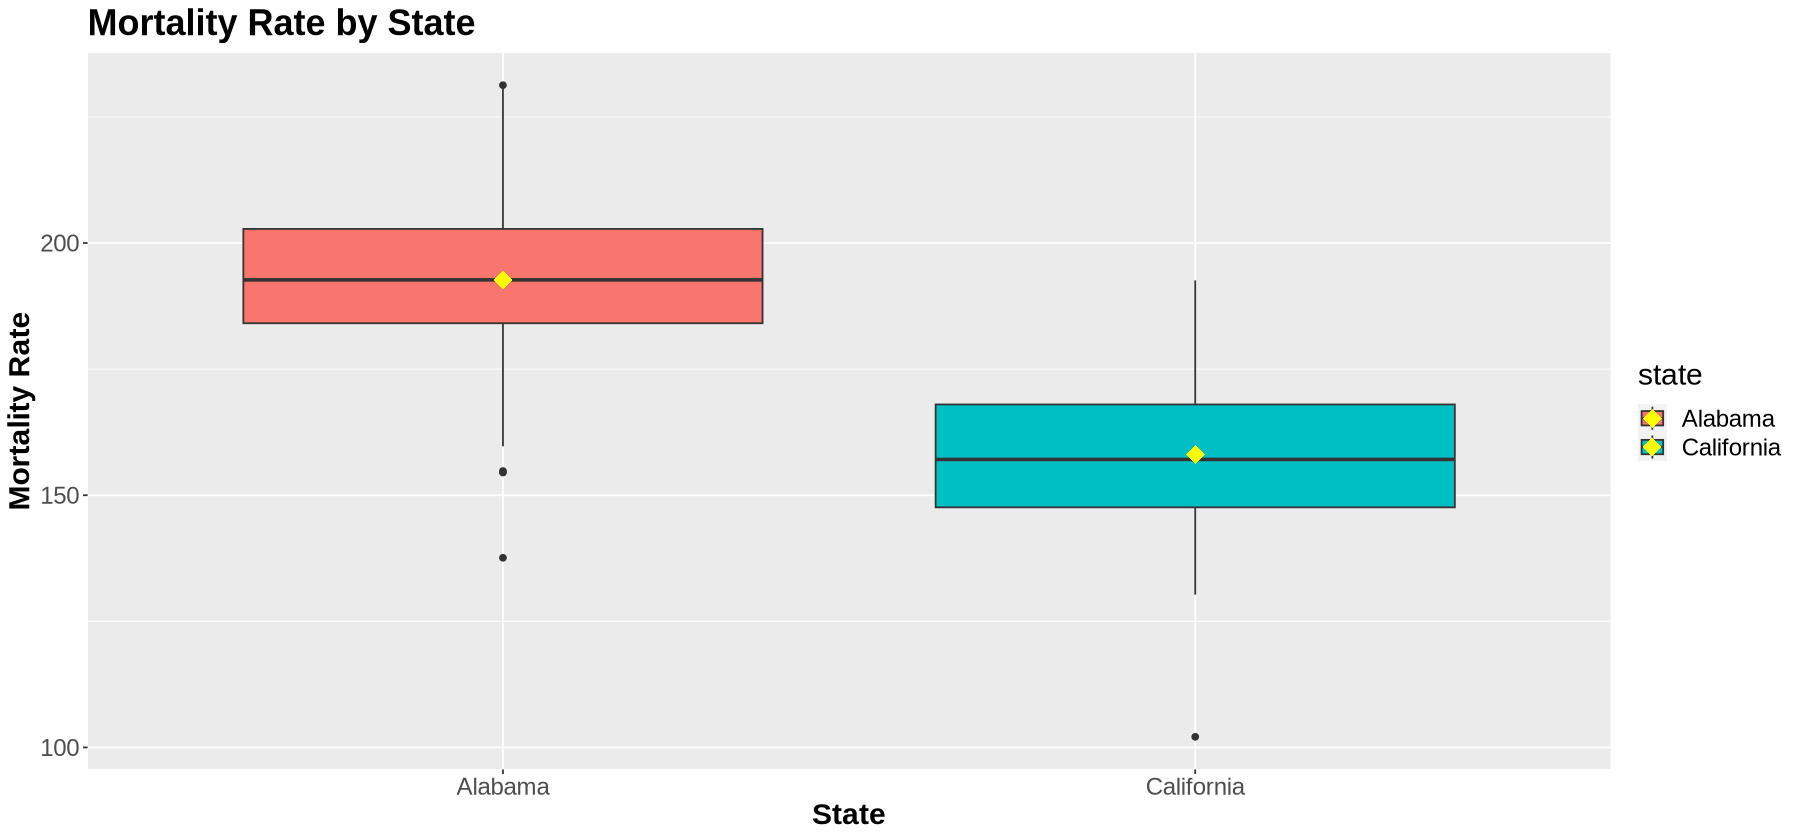

In [16]:
options(repr.plot.width = 15, repr.plot.height = 7) # Adjust these numbers so the plot looks good in your desktop.

# TARGET_deathRate_boxplots <- ... %>%
#   ggplot() +
#   ...(aes(..., ..., fill = ...)) +
#   theme(
#     text = element_text(size = 18),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold")
#   ) +
#   ggtitle(...) +
#   xlab(...) +
#   ylab(...) +
#   stat_summary(aes(..., ..., fill = ...),
#     fun = ..., colour = "yellow", geom = "point",
#     shape = 18, size = 5
#   )

# TARGET_deathRate_boxplots

# your code here
TARGET_deathRate_boxplots <- AC_cancer_data %>%
  ggplot() +
  geom_boxplot(aes(state, TARGET_deathRate, fill = state)) +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Mortality Rate by State") +
  xlab("State") +
  ylab("Mortality Rate") +
  stat_summary(aes(state, TARGET_deathRate, fill = state),
    fun = mean, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )

TARGET_deathRate_boxplots

In [17]:
test_2.0()

Test passed 🎊
Test passed 🎊
Test passed 🥇
Test passed 🎊
Test passed 🌈
Test passed 🎊
Test passed 🥇
Test passed 😀
[1] "Success!"


The side-by-side boxplots in `TARGET_deathRate_boxplots` show some differences in mortality rates between both states. Let's use data, and a linear regression to estimate the relationship between these variables and test this hypothesis!!

#### How can we include a categorical variable in a mathematical equation??

Note that this is like having 2 LR in one:

- For counties in Alabama, $X_i=0$, then $Y_i = \beta_0 + \beta_1 \times 0 + \varepsilon_i = \beta_0 + \varepsilon_i$


- For counties in California, $X_i=1$, then $Y_i = \beta_0 + \beta_1 \times 1 + \varepsilon_i = \beta_0 + \beta_1 + \varepsilon_i$


Then,


- For counties in Alabama, $X_i=0$, $E[Y_i|X_i=0] = \beta_0$


- For counties in California, $X_i=1$, $E[Y_i|X_i=1] = \beta_0 + \beta_1$




### R Code

R creates special numerical variables for you, called dummy variables, to include in the model if you indicate that the input variable (in our case `state`) is a *factor*!! For example, 

`AC_data_LR <- lm(TARGET_deathRate ~ state, data = AC_cancer_data)`

If `state` is a factor, R creates a dummy variables to estimate the model:

- `R` calls the dummy variable `stateCalifornia` (name of the variable followed by the level corresponding to 1)


- The reference level (dummy variable = 0, level "left out") is "Alabama", chosen alphabetically.

#### Important: Note that there's not a *line* in this case!! We can still call it a "linear regression" because the model is a linear combination of variables! 

**Question 2.1**
<br>{points: 1}

Using `AC_cancer_data`, use a LR to estimate the relation between `TARGET_deathRate` and `state` and assign it to the object `AC_data_LR`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [18]:
# AC_data_LR <- ...(...,
#   ...
# )
# AC_data_LR

# your code here
AC_data_LR <- lm(TARGET_deathRate ~ state,
  data = AC_cancer_data
)
AC_data_LR


Call:
lm(formula = TARGET_deathRate ~ state, data = AC_cancer_data)

Coefficients:
    (Intercept)  stateCalifornia  
         192.73           -34.63  


In [19]:
test_2.1.0()
test_2.1.1()

Test passed 🌈
Test passed 🥳
[1] "Success!"
Test passed 🌈
Test passed 😸
[1] "Success!"


**Question 2.2**
<br>{points: 1}

Find the estimated coefficients of `AC_data_LR` using `tidy()`. Report the estimated coefficients, their standard errors, and corresponding $p$-values. Include the corresponding asymptotic 95% confidence intervals. 

Store the results in the variable `AC_data_LR_results`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [20]:
# AC_data_LR_results <- ...(..., ...) %>% mutate_if(is.numeric, round, 2)
# AC_data_LR_results

# your code here
AC_data_LR_results <- tidy(AC_data_LR, conf.int = TRUE) %>% mutate_if(is.numeric, round, 2)
AC_data_LR_results

term            estimate std.error statistic p.value conf.low conf.high
1 (Intercept)     192.73   2.19       88.12    0       188.40   197.06   
2 stateCalifornia -34.63   3.17      -10.91    0       -40.92   -28.35

In [21]:
test_2.2()

Test passed 😀
Test passed 🌈
Test passed 🌈
Test passed 🥳
Test passed 🎊
Test passed 🌈
Test passed 🌈
Test passed 🥇
Test passed 🎉
Test passed 🌈
[1] "Success!"


**Question 2.3**
<br>{points: 1}

Recall that we want to investigate if the expected mortality rates are statistically different between states. Hence, it will be necessary to perform a hypothesis testing on the regression coefficient corresponding to `state`. In plain words, the hypotheses ($H_0$ versus $H_1$) are the following:

$$H_0: \text{there is no difference in the expected mortality rates (means) between both states}$$
$$H_1: \text{there is a difference in the expected mortality rates (means) between both states}$$

What is the mathematical translation of these hypotheses?

**A.** $H_0: \beta_1 = 0$ vs. $H_1: \beta_1 > 0$

**B.** $H_0: \beta_0 = 0$ vs. $H_1: \beta_0 \neq 0$

**C.** $H_0: \beta_0 = 0$ vs. $H_1: \beta_0 > 0$

**D.** $H_0: \hat{\beta}_1$ = 0 vs. $H_1: \hat{\beta}_1 \neq 0$

**E.** $H_0: \hat{\beta}_0$ = 0 vs. $H_1: \hat{\beta}_0 > 0$

**F.** $H_0: \beta_1 = 0$ vs. $H_1: \beta_1 \neq 0$

*Assign your answer to an object called `answer2.3`. Your answer should be one of `"A"`, `"B"`, `"C"`, `"D"`, `"E"`, or `"F"` surrounded by quotes.*

In [22]:
# answer2.3 <- 

# your code here
answer2.3 <- "F"

In [23]:
test_2.3()

Test passed 🎊
Test passed 🌈
Test passed 😸
[1] "Success!"


**Question 2.4**
<br>{points: 1}

Using the corresponding $p$-value stored in `AC_data_LR_results` and a **significance level $\alpha = 0.05$**, in plain words, what is the conclusion of the hypothesis test in **Question 2.3**?

**A.** We fail to reject the null hypothesis; thus, there is no statistically significant difference in the mortality rates between states.

**B.** We reject the alternative hypothesis; thus, there is no statistically significant difference in the average mortality rates between states.

**C.** We reject the null hypothesis; thus, there is a statistically significant difference in the average mortality rates between states.

*Assign your answer to an object called `answer2.4`. Your answer should be one of `"A"`, `"B"`, or `"C"`, surrounded by quotes.*

In [24]:
# answer2.4 <- 

# your code here
answer2.4 <- "C"

In [25]:
test_2.4()

Test passed 🎊
Test passed 😸
Test passed 🎉
[1] "Success!"


In [26]:
AC_data_LR_results

term            estimate std.error statistic p.value conf.low conf.high
1 (Intercept)     192.73   2.19       88.12    0       188.40   197.06   
2 stateCalifornia -34.63   3.17      -10.91    0       -40.92   -28.35

**Question 2.5**
<br>{points: 1}


What is the correct interpretation of the estimated regression coefficient for the dummy variable `stateCalifornia`?

**A.** The average mortality rate in California is 34.63 (cases/100,000) below that of Alabama.

**B.** The average mortality rate in Alabama is 34.63 (cases/100,000) below that of California.

**C.** The average mortality rate in California is 34.63 (cases/100,000).


*Assign your answers to the object `answer2.5` (it should be one of `"A"`, `"B"`, or `"C"` surrounded by quotes).*

In [27]:
# answer2.5 <- ...

# your code here
answer2.5 <- "A"

In [28]:
test_2.5()

Test passed 😀
Test passed 🎉
Test passed 🎊
[1] "Success!"


### But wait: isn't this a 2-sample t-test??

> run the following cell and discuss results with your neighbour.

In [29]:
t.test(TARGET_deathRate ~ state,AC_cancer_data,var.equal=T)


	Two Sample t-test

data:  TARGET_deathRate by state
t = 10.913, df = 118, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Alabama and group California is not equal to 0
95 percent confidence interval:
 28.34794 40.91622
sample estimates:
   mean in group Alabama mean in group California 
                192.7286                 158.0965 


#### This is not a coincidence! `lm` is running the *same* *t*-test!!

### Categorical variable with more than 2 levels¶

But what do we do if the categorical variable has more levels??!

We need additional dummy variables! Dummy variables are comparisons to a *reference* level. Thus, we need more of these variables to compare all other levels with respect to the reference.

Don't worry, R will create these variables (as long as the categorical variables is a factor).

In [30]:
ACK_cancer_data <- US_cancer_data %>%filter(state %in% c("California", "Alabama", "Kansas"))%>% 
                            droplevels()

ACK_cancer_data$state <- as.factor(ACK_cancer_data$state)

In [31]:
ACK_data_LR <- tidy(lm(TARGET_deathRate ~ state,
                  data = ACK_cancer_data))  %>% mutate_if(is.numeric, round, 3)
ACK_data_LR

term            estimate std.error statistic p.value
1 (Intercept)     192.729  2.785     69.190    0      
2 stateCalifornia -34.632  4.042     -8.569    0      
3 stateKansas     -24.894  3.543     -7.027    0

#### <font color="blue"> Categorical variables can be included in a LR using dummy variables

Dummy variables:

- R creates them for all factors in the model
    
    
- (by default) a reference level is chosen alphabetically 
    

- levels of a categorical variable are compared to the reference level!! 

# PART II

## 3. MLR: additive model with one continuous and one categorical variable

**Question 3.0**
<br>{points: 1}

Use the data to estimate this additive model. Report the estimated coefficients, their standard errors, and corresponding $p$-values using `tidy()`. Include the corresponding asymptotic 95% confidence intervals. 

Store the results in the variable `MLR_state_poverty_add_results`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [32]:
# MLR_state_poverty_add <- ...(...,
#   ...
# )
# MLR_state_poverty_add

# MLR_state_poverty_add_results <- ...(..., ...) %>% mutate_if(is.numeric, round, 2)
# MLR_state_poverty_add_results

# your code here
MLR_state_poverty_add <- lm(TARGET_deathRate ~ povertyPercent + state,
  data = AC_cancer_data
)
MLR_state_poverty_add

MLR_state_poverty_add_results <- tidy(MLR_state_poverty_add, conf.int = 0.95) %>% mutate_if(is.numeric, round, 2)
MLR_state_poverty_add_results




Call:
lm(formula = TARGET_deathRate ~ povertyPercent + state, data = AC_cancer_data)

Coefficients:
    (Intercept)   povertyPercent  stateCalifornia  
        168.485            1.105          -28.810  


term            estimate std.error statistic p.value conf.low conf.high
1 (Intercept)     168.48   5.82      28.93     0       156.95   180.02   
2 povertyPercent    1.10   0.25       4.44     0         0.61     1.60   
3 stateCalifornia -28.81   3.23      -8.93     0       -35.20   -22.42

In [33]:
test_3.0()

Test passed 🥇
Test passed 🎉
Test passed 😀
Test passed 🌈
Test passed 🥇
Test passed 😀
Test passed 🌈
Test passed 😀
Test passed 🌈
Test passed 🥇
[1] "Success!"


#### NOTE: there are 3 coefficients for 2 lines because the additive model assumes a *common* slope!!

**Question 3.1**
<br>{points: 1}

Using a **significance level $\alpha = 0.10$**, and the results in `MLR_state_poverty_add_results`, which of the following interpretations is correct?

**A.** On average, the mortality rate in California is statistically different from that in Alabama.

**B.** On average, the mortality rate is statistically associated with poverty.

**C.** The association between mortality and poverty differs per state.

**D.** The expected mortality rate is the same in both states.

*Assign your answers to the object `answer3.1`. Your answers have to be included in a single string indicating the correct options **in alphabetical order** and surrounded by quotes (e.g., `"ABCD"` indicates you are selecting the four options).*

In [34]:
# answer3.1 <- 

# your code here
answer3.1 <- "AB"

In [35]:
test_3.1()

Test passed 🌈
Test passed 😀
Test passed 🌈
[1] "Success!"


#### **Question 3.2**
<br>{points: 1}

Create a plot of the data (using `geom_point()`) along with the estimated regression lines coming from the additive regression model `MLR_state_poverty_add` (note that your plot should have two regression lines, one for each state). 

- You have to colour the points and regression lines by state. 

- Include a legend indicating what colour corresponds to each state with proper axis labels. 

The `ggplot()` object's name will be `MLR_state_poverty_add_plot`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


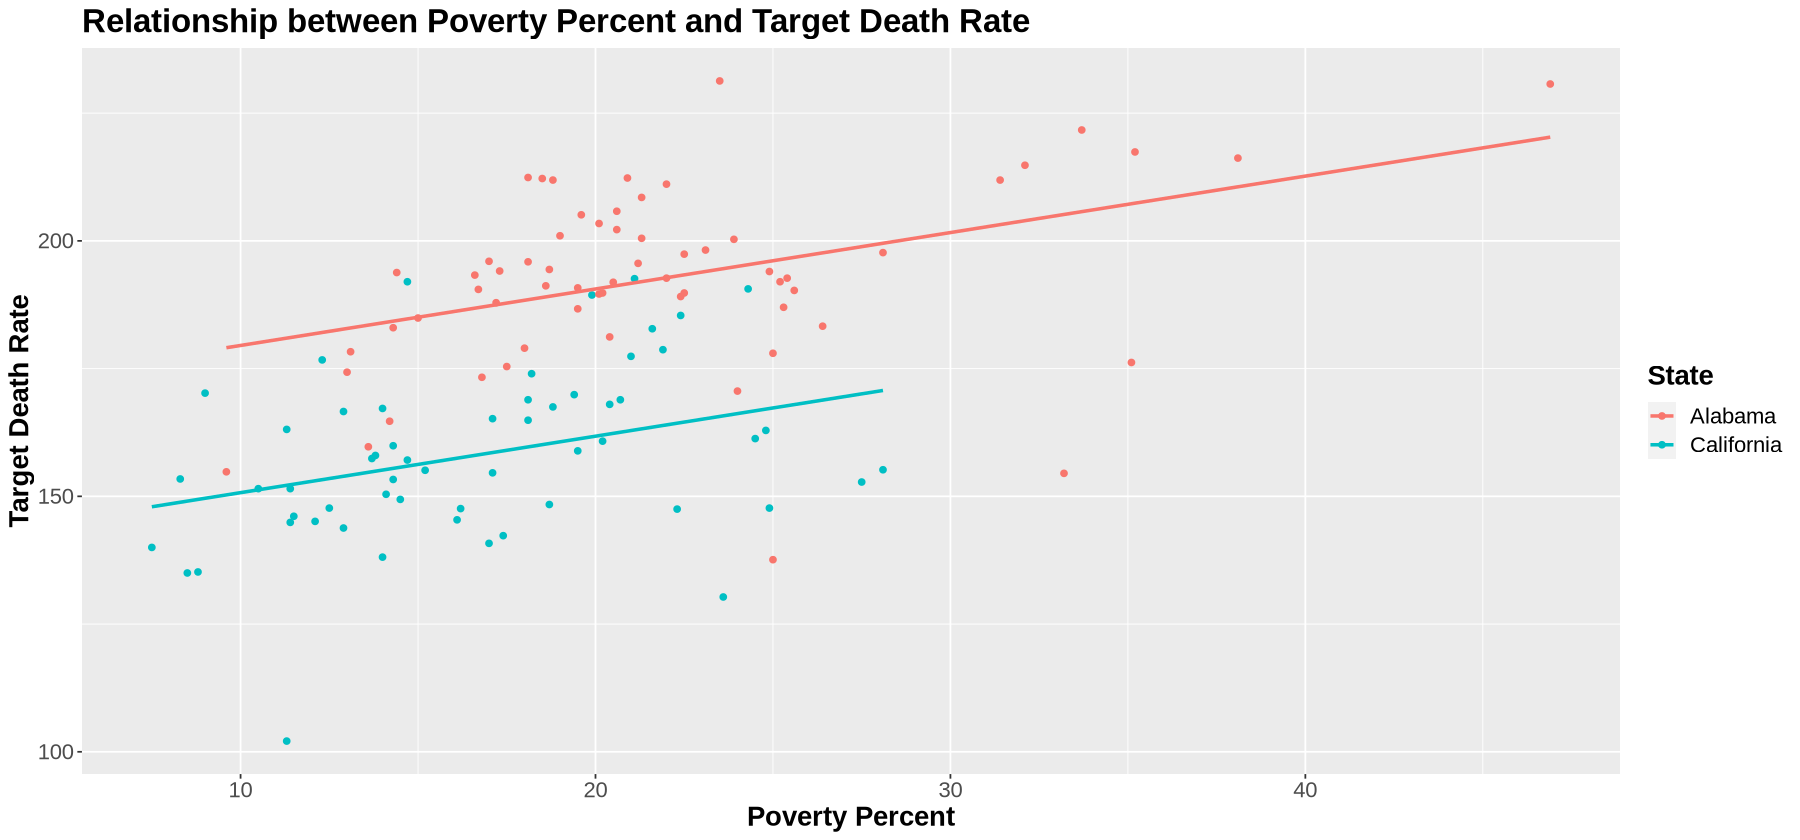

In [36]:
# AC_cancer_data$pred_MLR_add <- predict(MLR_state_poverty_add) # Using predict() to create estimated regression lines.

# MLR_state_poverty_add_plot <- ggplot(..., aes(
#   ...,
#   ...,
#   color = ...
# )) +
#   ...() +
#   geom_line(aes(y = pred_MLR_add), size = 1) +
#   labs(
#     title = ...,
#     x = ...,
#     y = ...
#   ) +
#   theme(
#     text = element_text(size = 16.5),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold"),
#     legend.title = element_text(face = "bold"),
#   ) +
#   labs(color = "State")
# MLR_state_poverty_add_plot

# your code here
AC_cancer_data$pred_MLR_add <- predict(MLR_state_poverty_add) # Using predict() to create estimated regression lines.

MLR_state_poverty_add_plot <- ggplot(AC_cancer_data, aes(
  povertyPercent,
  TARGET_deathRate,
  color = state
)) +
  geom_point() +
  geom_line(aes(y = pred_MLR_add), size = 1) +
  labs(
    title = "Relationship between Poverty Percent and Target Death Rate",
    x = "Poverty Percent",
    y = "Target Death Rate"
  ) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  ) +
  labs(color = "State")
MLR_state_poverty_add_plot

In [37]:
test_3.2()

Test passed 🎉
Test passed 🥇
Test passed 🎊
Test passed 🎉
Test passed 🎉
Test passed 🥳
Test passed 🥇
Test passed 😸
[1] "Success!"


#### **Question 3.3**
<br>{points: 1}

Looking at the plot in **Question 3.2** and the modelling framework in **Question 3.0**, what is the fundamental assumption we are making when using an additive MLR with a mixture of continuous and categorical explanatory variables?

**A.** The regression lines for both states have different slopes relating poverty to average mortality.

**B.** The regression lines for both states have the same slopes relating poverty to average mortality, but different intercepts.

**C.** The regression lines for both states have different slopes and intercepts relating poverty to average mortality.

*Assign your answer to the object `answer3.3`. Your answer should be one of `"A"`, `"B"`, or `"C"` surrounded by quotes.*

In [38]:
# answer3.3 <- 

# your code here
answer3.3 <- "B"

In [39]:
test_3.3()

Test passed 🎊
Test passed 🎉
Test passed 🥇
[1] "Success!"


#### <font color="blue"> An additive model with one continuous and one categorical input variable, has a common slope and different intercepts for each level of the categorical variable </font>  

## 4. MLR: interaction between a continuous and a categorical variable

Now, estimate another MLR model called `MLR_state_poverty_int` but this time we do not assume that the association between mortality and poverty is the same in both states. 

> In other words, there may exist an *interaction* between the input variables.

#### <font color="blue">If the relation changes by the levels of the categorical variable, we need to add interaction term(s)</font>

#### **Question 4.0**
<br>{points: 1}

Use the data to estimate the new model with an interaction term. Report the estimated coefficients, their standard errors, and corresponding $p$-values using `tidy()`. Include the corresponding asymptotic 95% confidence intervals. Store the results in the variable `MLR_state_poverty_int_results`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [40]:
# MLR_state_poverty_int <- ...(...,
#   ...
# )
# MLR_state_poverty_int

# MLR_state_poverty_int_results <- ...(..., ...) %>% mutate_if(is.numeric, round, 2)
# MLR_state_poverty_int_results

# your code here
MLR_state_poverty_int <- lm(TARGET_deathRate ~ povertyPercent * state,
  data = AC_cancer_data
)
MLR_state_poverty_int

MLR_state_poverty_int_results <- tidy(MLR_state_poverty_int, conf.int = 0.95) %>% mutate_if(is.numeric, round, 2)
MLR_state_poverty_int_results




Call:
lm(formula = TARGET_deathRate ~ povertyPercent * state, data = AC_cancer_data)

Coefficients:
                   (Intercept)                  povertyPercent  
                      169.9975                          1.0359  
               stateCalifornia  povertyPercent:stateCalifornia  
                      -32.4867                          0.1987  


term                           estimate std.error statistic p.value conf.low
1 (Intercept)                    170.00    7.08     24.01     0.00    155.98  
2 povertyPercent                   1.04    0.31      3.35     0.00      0.42  
3 stateCalifornia                -32.49   10.23     -3.18     0.00    -52.75  
4 povertyPercent:stateCalifornia   0.20    0.52      0.38     0.71     -0.84  
  conf.high
1 184.02   
2   1.65   
3 -12.22   
4   1.24

In [41]:
test_4.0()

Test passed 🎊
Test passed 😀
Test passed 🌈
Test passed 🥇
Test passed 🥳
Test passed 🥳
Test passed 🥇
Test passed 🎊
Test passed 🎉
Test passed 🌈
[1] "Success!"


#### NOTE: there are now 4 coefficients for 2 lines because in the model with interactions we do *NOT* assume a common slope!!

**Question 4.1**
<br>{points: 1}

Using a **significance level $\alpha = 0.10$**, and the results in `MLR_state_poverty_int_results`, which of the following interpretations is correct?

**A.** Mortality rates in Alabama are low.

**B.** The expected mortality rate does not differ by state.

**C.** In California, the expected change in mortality as poverty increases is higher than in Alabama.

**D.** In Alabama, the mortality rate is statistically associated with poverty.

**E.** The association between mortality and poverty varies (significantly) between Alabama and California.

**F.** The association between mortality and poverty is the same in Alabama and California.

*Assign your answers to the object `answer4.1`. Your answers have to be included in a single string indicating the correct options **in alphabetical order** and surrounded by quotes (e.g., `"ABCD"` indicates you are selecting the four options).*

In [42]:
# answer4.1 <- 

# your code here
answer4.1 <- "D"

In [43]:
test_4.1()

Test passed 🥇
Test passed 😀
Test passed 🌈
[1] "Success!"


**Question 4.2**
<br>{points: 1}

Create a plot of the data (using `geom_point()`) along with the estimated regression lines coming from the interaction regression model `MLR_state_poverty_int` (note that your plot should have two regression lines, oone for each state). 

- You have to colour the points and regression lines by state. 

- Include a legend indicating what colour corresponds to each state with proper axis labels. 

The `ggplot()` object's name will be `MLR_state_poverty_int_plot`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

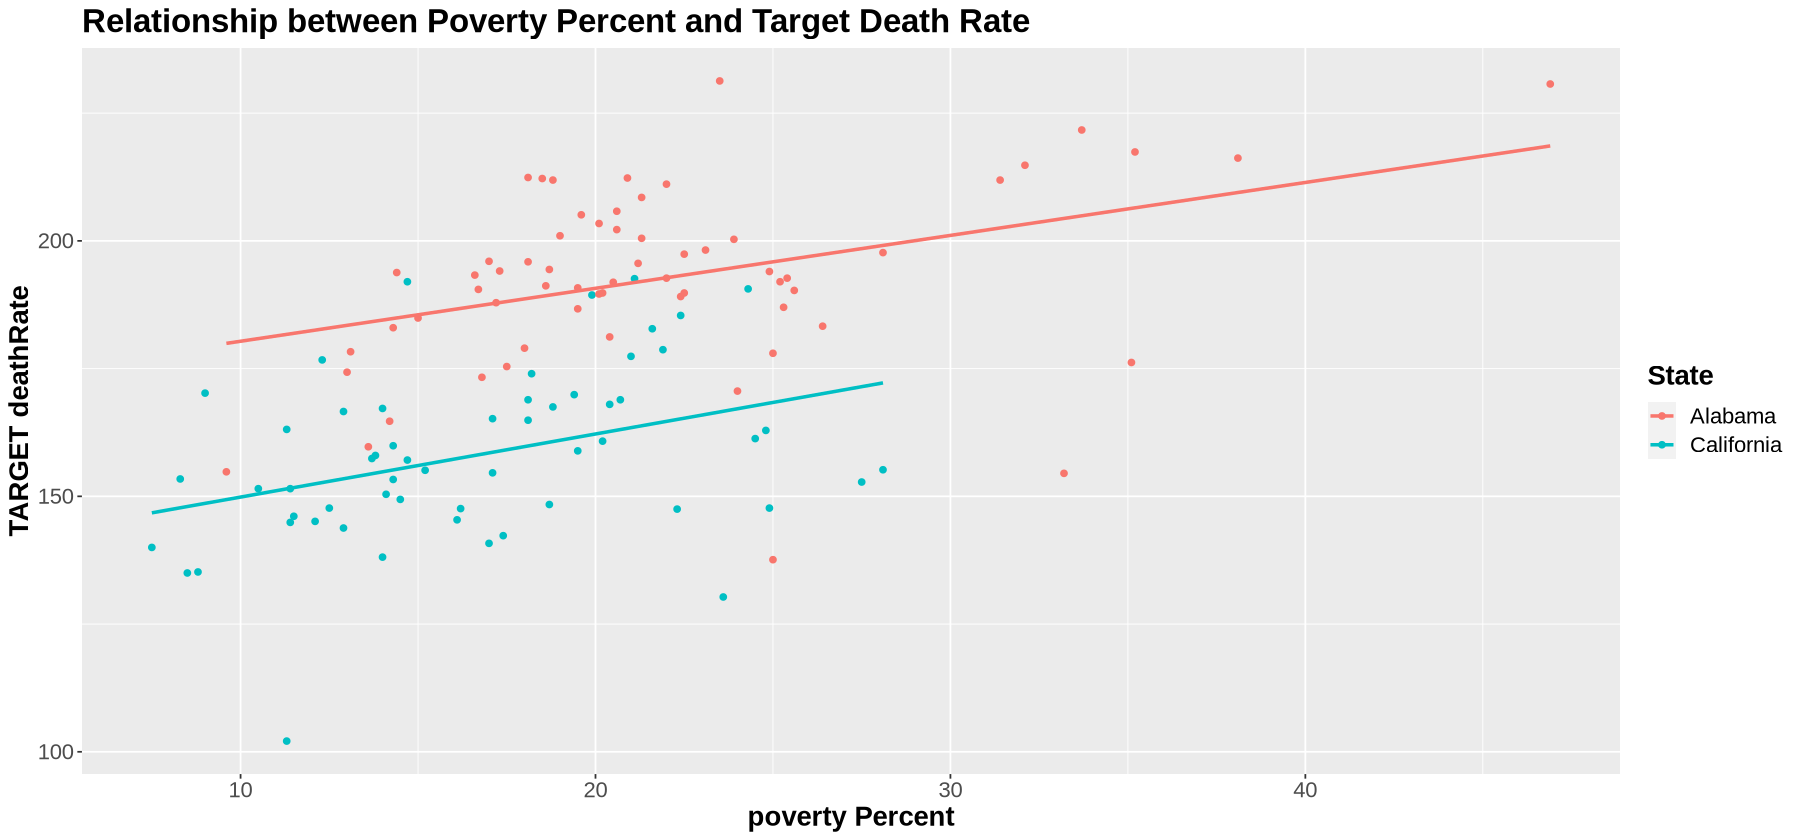

In [44]:
# AC_cancer_data$pred_MLR_int <- predict(MLR_state_poverty_int) # Using predict() to create estimated regression lines.

# MLR_state_poverty_int_plot <- ggplot(..., aes(
#   ...,
#   ...,
#   color = ...
# )) +
#   ...() +
#   geom_line(aes(y = pred_MLR_int), size = 1) +
#   labs(
#     title = ...,
#     x = ...,
#     y = ...
#   ) +
#   theme(
#     text = element_text(size = 16.5),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold"),
#     legend.title = element_text(face = "bold"),
#   ) +
#   labs(color = "State")
# MLR_state_poverty_int_plot


# your code here
AC_cancer_data$pred_MLR_int <- predict(MLR_state_poverty_int) # Using predict() to create estimated regression lines.

MLR_state_poverty_int_plot <- ggplot(AC_cancer_data, aes(
  povertyPercent,
  TARGET_deathRate,
  color = state
)) +
  geom_point() +
  geom_line(aes(y = pred_MLR_int), size = 1) +
  labs(
    title = "Relationship between Poverty Percent and Target Death Rate",
    x = "poverty Percent",
    y = "TARGET deathRate"
  ) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  ) +
  labs(color = "State")
MLR_state_poverty_int_plot



In [45]:
test_4.2()

Test passed 😀
Test passed 🎊
Test passed 😸
Test passed 😸
Test passed 😀
Test passed 😸
Test passed 🥳
Test passed 😀
[1] "Success!"


**Question 4.3**
<br>{points: 1}

Looking at the plot in **Question 4.2** and the modelling framework in **Question 4.0**, what is the fundamental assumption we are making when using an interaction MLR with a mixture of continuous and categorical explanatory variables?

**A.** The regression lines for both states have the same slope relating poverty to average mortality, but different intercepts.

**B.** The regression lines for both states have different slopes and intercepts relating poverty to average mortality.

**C.** The regression lines for both states have different slopes relating poverty to average mortality, but same intercepts.

*Assign your answer to the object `answer4.3`. Your answer should be one of `"A"`, `"B"`, or `"C"` surrounded by quotes.*

In [46]:
# answer4.3 <- 

# your code here
answer4.3 <- "B"

In [47]:
test_4.3()

Test passed 🎊
Test passed 🌈
Test passed 🥇
[1] "Success!"


#### <font color="blue"> If the relation between the continuous predictor and the response changes for each  level of the categorical variable, we need to add interaction term(s). The model now has different slopes and different intercepts for each level of the categorical variable </font>  